Code Implementation
____

1. Text Processing and Data Preparation

In [1]:
import pandas as pd

import os
import json
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Files
files = ["DataFiles\\Salad.txt", "DataFiles\\Sides.txt", "DataFiles\\Drinks.txt", "DataFiles\\Desserts.txt", "DataFiles\\Breakfast and Brunch.txt", "DataFiles\\Bread.txt"]

# Load and process data
recipes = {}
for file in files:
    category = os.path.splitext(file)[0]
    with open(file, "r") as f:
        text = f.read()
        # Extract recipe lists
        recipe_list = re.findall(r"\[(.*?)\]", text, re.DOTALL)
        recipes[category] = recipe_list

# Save structured data to JSON
with open("recipes.json", "w") as f:
    json.dump(recipes, f, indent=4)


2. Building the Hybrid Recommendation Model

2.1 Deep Learning for Feature Analysis

Use TF-IDF for extracting meaningful features from recipes. Later, this can be extended to embeddings from deep learning models like BERT for ingredient relationships.

In [20]:
# TF-IDF Vectorization
recipe_texts = []
categories = []
for category, recipe_list in recipes.items():
    for recipe in recipe_list:
        recipe_texts.append(recipe)
        categories.append(category)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(recipe_texts)

# Cosine Similarity for Recommendations
def recommend_recipe(query, top_n=5):
    query_vector = tfidf.transform([query])
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    recommendations = sorted(enumerate(similarities), key=lambda x: -x[1])[:top_n]
    return [(recipe_texts[i], categories[i], similarities[i]) for i, _ in recommendations]

# Example Query
query = "Sugar"
recommendations = recommend_recipe(query)
print("Recommendations:")
for rec in recommendations:
    print(f"Recipe: {rec[0]}, Category: {rec[1]}, Similarity: {rec[2]:.2f}")


Recommendations:
Recipe: 1 cup shortening
 1 cup confectioners' sugar
 1 cup white sugar, Category: DataFiles\Desserts, Similarity: 0.43
Recipe: 1 cup white sugar
 1 cup brown sugar
 1 cup heavy cream, Category: DataFiles\Desserts, Similarity: 0.40
Recipe: 1/4 cup butter
 3/4 cup brown sugar
 1/4 cup heavy cream
 2 cups confectioners' sugar, Category: DataFiles\Desserts, Similarity: 0.36
Recipe: 1 cup brown sugar
 1 cup white sugar
 1/3 cup water
 1 tablespoon butter
 2 cups chopped pecans, Category: DataFiles\Desserts, Similarity: 0.36
Recipe: 1/2 cup butter
 1/2 cup brown sugar
 1/2 cup white sugar
 1/8 teaspoon salt
 1/2 cup heavy whipping cream
 1 teaspoon vanilla extract
 2 cups confectioners' sugar
 1 cup chopped pecans, Category: DataFiles\Desserts, Similarity: 0.35


___
___

In [2]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Flatten Recipes with Food Item Names and Categories
recipe_texts = []
categories = []
food_names = []
for category, recipe_list in recipes.items():
    for recipe in recipe_list:
        recipe_texts.append(recipe["recipe"])
        categories.append(category)
        food_names.append(recipe["name"])

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(recipe_texts)

# Function to Filter Recipes Based on Allergies
def filter_recipes_by_allergy(allergies):
    """
    Removes recipes containing any allergenic ingredients.
    """
    filtered_recipes = []
    filtered_categories = []
    filtered_names = []
    for i, recipe in enumerate(recipe_texts):
        if not any(allergy.lower() in recipe.lower() for allergy in allergies):
            filtered_recipes.append(recipe)
            filtered_categories.append(categories[i])
            filtered_names.append(food_names[i])
    return filtered_recipes, filtered_categories, filtered_names

# Recommendation Function
def recommend_recipe(query, allergies, top_n=5):
    """
    Recommend recipes based on the query, excluding those with allergic ingredients.
    """
    # Filter recipes based on allergies
    filtered_recipes, filtered_categories, filtered_names = filter_recipes_by_allergy(allergies)
    if not filtered_recipes:
        return "No recipes available matching your preferences."

    # Recompute TF-IDF for filtered recipes
    filtered_tfidf_matrix = tfidf.fit_transform(filtered_recipes)

    # Compute similarities
    query_vector = tfidf.transform([query])
    similarities = cosine_similarity(query_vector, filtered_tfidf_matrix).flatten()

    # Get top recommendations
    recommendations = sorted(enumerate(similarities), key=lambda x: -x[1])[:top_n]
    return [(filtered_names[i], filtered_recipes[i], filtered_categories[i], similarities[i]) for i, _ in recommendations]

# User Input for Allergies
allergies = input("Enter ingredients you are allergic to (comma-separated): ").split(",")
allergies = [allergy.strip() for allergy in allergies]

# Example Query
query = input("Enter a keyword or ingredient you want to explore: ")
recommendations = recommend_recipe(query, allergies)

# Output Recommendations
print("\nRecommendations:")
if isinstance(recommendations, str):
    print(recommendations)
else:
    for rec in recommendations:
        print(f"Food Name: {rec[0]}\nRecipe: {rec[1]}\nCategory: {rec[2]}\nSimilarity: {rec[3]:.2f}\n")


TypeError: string indices must be integers, not 'str'

2.2 Graph Clustering for Trust Networks

Simulate a graph of users and recipes based on preferences. For now, this mock graph demonstrates clustering functionality.

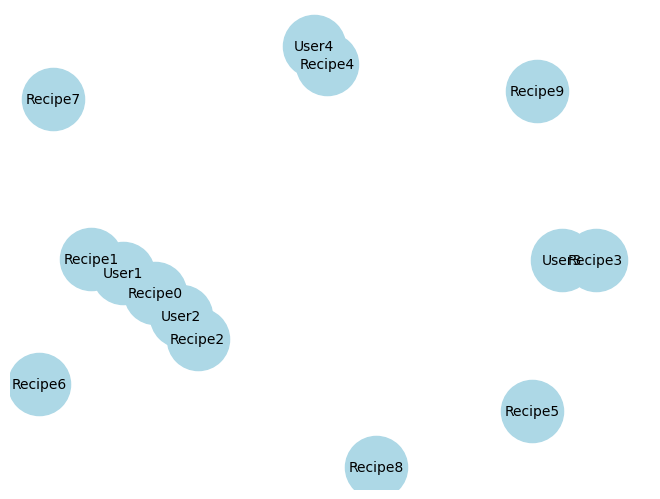

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Mock Graph Data
G = nx.Graph()

# Users
users = ["User1", "User2", "User3", "User4"]
for user in users:
    G.add_node(user, type="user")

# Recipes as nodes
for idx, recipe in enumerate(recipe_texts[:10]):  # Use first 10 recipes
    G.add_node(f"Recipe{idx}", type="recipe")

# Edges (User preferences for recipes)
edges = [
    ("User1", "Recipe0"),
    ("User1", "Recipe1"),
    ("User2", "Recipe0"),
    ("User2", "Recipe2"),
    ("User3", "Recipe3"),
    ("User4", "Recipe4"),
]
G.add_edges_from(edges)

# Visualize Graph
nx.draw(G, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
plt.show()


2.3 Reinforcement Learning for Real-Time Updates

Implement a Q-learning agent that learns from user feedback.

In [11]:
import numpy as np

# Mock Q-Learning Example
n_recipes = len(recipe_texts)
q_table = np.zeros((n_recipes, n_recipes))  # State-Action Table

# Mock Rewards
feedback = [1, 0, 1, -1, 1]  # Simulated user feedback for some recommendations

# Update Q-Table
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor

for i, reward in enumerate(feedback):
    current_state = i
    next_state = (i + 1) % n_recipes
    q_table[current_state, next_state] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[current_state, next_state])

print("Q-Table after feedback update:")
print(q_table)


Q-Table after feedback update:
[[0.  0.1 0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


_________
_________

3. Evaluation Metrics

Here are the primary metrics used for testing recommendation systems:

3.1 Precision, Recall, and F1-Score
* Precision: Measures how many recommended items are relevant.
* Recall: Measures how many relevant items are recommended.
* F1-Score: Combines precision and recall into a single metric.

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example User Interaction Data
true_recommendations = [1, 0, 1, 1, 0]  # Actual user preferences (1 = relevant, 0 = irrelevant)
predicted_recommendations = [1, 0, 0, 1, 1]  # Predicted system recommendations

# Precision, Recall, and F1-Score
precision = precision_score(true_recommendations, predicted_recommendations)
recall = recall_score(true_recommendations, predicted_recommendations)
f1 = f1_score(true_recommendations, predicted_recommendations)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.67
Recall: 0.67
F1-Score: 0.67


3.2 Mean Average Precision (MAP)

Measures how well the system ranks relevant items for users.

In [13]:
import numpy as np

def mean_average_precision(relevance_scores):
    """
    relevance_scores: List of lists where each sublist contains binary relevance scores for a user's recommendations.
    """
    map_score = 0
    for user_scores in relevance_scores:
        num_relevant = 0
        precision_sum = 0
        for idx, score in enumerate(user_scores):
            if score == 1:
                num_relevant += 1
                precision_sum += num_relevant / (idx + 1)
        map_score += precision_sum / max(1, sum(user_scores))
    return map_score / len(relevance_scores)

# Example Relevance Scores for 3 Users
user_relevance = [
    [1, 0, 1, 0, 1],  # User 1
    [1, 1, 0, 1, 0],  # User 2
    [0, 1, 1, 0, 0],  # User 3
]

print(f"Mean Average Precision (MAP): {mean_average_precision(user_relevance):.2f}")


Mean Average Precision (MAP): 0.75


3.3 Normalized Discounted Cumulative Gain (NDCG)

Measures how well the model ranks items in terms of their relevance, giving higher weight to items at the top of the ranking.

In [14]:
def ndcg(relevance_scores, k):
    """
    relevance_scores: Binary relevance scores (1 = relevant, 0 = irrelevant) in predicted order.
    k: Number of top recommendations to evaluate.
    """
    dcg = 0
    idcg = 0
    for i in range(k):
        rel = relevance_scores[i] if i < len(relevance_scores) else 0
        dcg += (2**rel - 1) / np.log2(i + 2)
        idcg += 1 / np.log2(i + 2) if i < sum(relevance_scores) else 0
    return dcg / idcg if idcg > 0 else 0

# Example Relevance Scores
relevance = [1, 0, 1, 0, 1]  # Predicted relevance
k = 5

print(f"NDCG@{k}: {ndcg(relevance, k):.2f}")

NDCG@5: 0.89


4. Cross-Validation

Divide your data into training and test sets to simulate real-world recommendation scenarios.

In [15]:
from sklearn.model_selection import train_test_split

# Example Data
user_ratings = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [0, 0, 5, 4],
])  # Rows: Users, Columns: Items

# Train-Test Split
train, test = train_test_split(user_ratings, test_size=0.25, random_state=42)

print("Training Data:")
print(train)
print("Test Data:")
print(test)

Training Data:
[[0 0 5 4]
 [5 3 0 1]
 [1 1 0 5]]
Test Data:
[[4 0 0 1]]


5. A/B Testing with User Feedback

Deploy the system for real users and measure click-through rates (CTR), engagement metrics, and user satisfaction scores.


In [16]:
# Simulate Feedback
actual_feedback = [1, 0, 1, 1, 0]  # Real preferences
predicted_feedback = [1, 1, 1, 0, 0]  # Recommendations

# Calculate Accuracy
accuracy = sum([1 for a, p in zip(actual_feedback, predicted_feedback) if a == p]) / len(actual_feedback)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


6. Reinforcement Learning-Specific Metrics

For the RL component, measure:

* Cumulative Reward: Sum of all rewards over episodes.
* Exploration vs. Exploitation: Percentage of exploratory actions vs. learned actions.

In [17]:
# Mock RL Rewards
rewards = [10, 5, -1, 20, 15]  # Example cumulative rewards for 5 episodes
print(f"Average Cumulative Reward: {np.mean(rewards):.2f}")

Average Cumulative Reward: 9.80
